<a href="https://colab.research.google.com/github/Vix-Hub/Python-Projects/blob/master/ProgettoCibernetica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
from datetime import datetime

def vectorized_result(j):
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

def load():
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

    x_train = x_train.reshape(x_train.shape[0], 784,)
    x_test = x_test.reshape(x_test.shape[0], 784,)

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    
    mean_vals = np.mean(x_train, axis=0)
    std_val = np.std(x_train)
    
    X_train_centered = (x_train - mean_vals)/std_val
    X_test_centered = (x_test - mean_vals)/std_val
    
    return X_train_centered, y_train, X_test_centered, y_test


#mini batch [10-150], eta [0.00001-1], nh [15-90]

X_train, y_train, X_test, y_test = load()

class MLP(object):
    
    def __init__(self, n_hidden, eta, mini_batch_size):
        self.n_hidden = n_hidden
        self.eta = eta
        self.minibatch_size = mini_batch_size
        self.eval_ = {'loss': []}
        
    def create_batch_generator(self,X, y, batch_size=128, shuffle=False):
        X_copy = np.array(X)
        y_copy = np.array(y)
    
        if shuffle:
            data = np.column_stack((X_copy, y_copy))
            np.random.shuffle(data)
            X_copy = data[:, :-1]
            y_copy = data[:, -1].astype(int)
    
        for i in range(0, X.shape[0], batch_size):
            yield (X_copy[i:i+batch_size, :], y_copy[i:i+batch_size])
            
    def fit(self, X_train, y_train, X_test, y_test, epochs):
           
            n_features = X_train.shape[1]
            n_classes = 10
            random_seed = 123
            np.random.seed(random_seed)
    
            g1 = tf.Graph()
            with g1.as_default():
                tf.set_random_seed(random_seed)
                tf_x = tf.placeholder(dtype=tf.float32,
                           shape=(None, n_features),
                           name='tf_x')
    
                tf_y = tf.placeholder(dtype=tf.int32, 
                            shape=None, name='tf_y')
                y_onehot = tf.one_hot(indices=tf_y, depth=n_classes)
    
                h1 = tf.layers.dense(inputs=tf_x, units=self.n_hidden,
                             activation=tf.sigmoid,
                             name='layer1')
    
                logits = tf.layers.dense(inputs=h1, 
                                 units=10,
                                 activation=None,
                                 name='layer3')
    
                predictions = {
                        'classes' : tf.argmax(logits, axis=1, 
                                  name='predicted_classes'),
                        'probabilities' : tf.nn.softmax(logits, 
                                  name='softmax_tensor')
                        }
            with g1.as_default():
                cost = tf.losses.mean_squared_error(labels=y_onehot, predictions = logits)
    
                optimizer = tf.train.GradientDescentOptimizer(
                        learning_rate=self.eta)
    
                train_op = optimizer.minimize(loss=cost)
    
                init_op = tf.global_variables_initializer()
                sess =  tf.Session(graph=g1)
                sess.run(init_op)
                
                t1 = datetime.now()
                training_costs = []
                for epoch in range(epochs):
                    batch_generator = self.create_batch_generator(
                            X_train, y_train, 
                            batch_size=self.minibatch_size, shuffle = False)
                    for batch_X, batch_y in batch_generator:
            
                        feed = {tf_x:batch_X, tf_y:batch_y}
                        _, batch_cost = sess.run([train_op, cost],
                                     feed_dict=feed)
                        training_costs.append(batch_cost)
                    print(' -- Epoch %2d  '
                             'Avg. Training Loss: %.4f' % (
                                     epoch+1, np.mean(training_costs)
                            ))
                    self.eval_['loss'].append(np.mean(training_costs))
    
                feed = {tf_x : X_test}
                y_pred = sess.run(predictions['classes'], 
                                  feed_dict=feed)
     
                acc = np.sum(y_pred == y_test)/y_test.shape[0]
                t2 = datetime.now()
                print(t2-t1)
                sess.close()
                return acc
    
    def plot(self):
        
        plt.plot(range(len(self.eval_['loss'])), self.eval_['loss'])
        plt.xlabel('Epochs')
        plt.ylabel('Cost')
        plt.title('Cost Function')
        plt.show()


Instructions for updating:
non-resource variables are not supported in the long term
4423680/4422102 [==============================] - 0s 0us/step


     |████████████████████████████████| 163kB 17.3MB/s 
2021-01-06 07:31:43.146953


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


 -- Epoch  1  Avg. Training Loss: 0.0485
 -- Epoch  2  Avg. Training Loss: 0.0423
 -- Epoch  3  Avg. Training Loss: 0.0392
 -- Epoch  4  Avg. Training Loss: 0.0372
 -- Epoch  5  Avg. Training Loss: 0.0358
 -- Epoch  6  Avg. Training Loss: 0.0346
 -- Epoch  7  Avg. Training Loss: 0.0337
 -- Epoch  8  Avg. Training Loss: 0.0329
 -- Epoch  9  Avg. Training Loss: 0.0323
 -- Epoch 10  Avg. Training Loss: 0.0317
0:00:07.760049
 -- Epoch  1  Avg. Training Loss: 0.0620
 -- Epoch  2  Avg. Training Loss: 0.0524
 -- Epoch  3  Avg. Training Loss: 0.0480
 -- Epoch  4  Avg. Training Loss: 0.0452
 -- Epoch  5  Avg. Training Loss: 0.0432
 -- Epoch  6  Avg. Training Loss: 0.0417
 -- Epoch  7  Avg. Training Loss: 0.0405
 -- Epoch  8  Avg. Training Loss: 0.0395
 -- Epoch  9  Avg. Training Loss: 0.0387
 -- Epoch 10  Avg. Training Loss: 0.0380
0:00:06.321481
 -- Epoch  1  Avg. Training Loss: 0.0576
 -- Epoch  2  Avg. Training Loss: 0.0499
 -- Epoch  3  Avg. Training Loss: 0.0461
 -- Epoch  4  Avg. Training

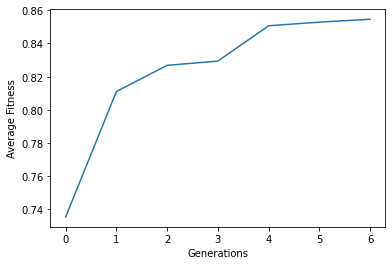

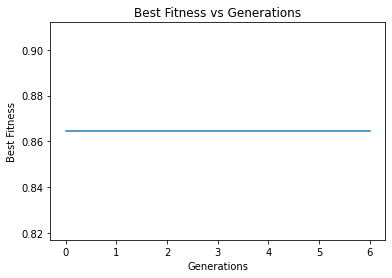

[[77, 12, 0.4855711141605901], [67, 12, 0.4855711141605901], [77, 12, 0.4855711141605901], [77, 12, 0.4855711141605901], [77, 12, 0.4855711141605901], [77, 12, 0.4855711141605901], [77, 12, 0.4855711141605901], [77, 12, 0.4855711141605901], [77, 12, 0.4855711141605901], [77, 12, 0.4855711141605901], [77, 12, 0.4855711141605901], [77, 12, 0.4855711141605901], [77, 12, 0.4855711141605901], [77, 12, 0.4855711141605901], [77, 12, 0.4855711141605901], [77, 12, 0.4855711141605901], [77, 12, 0.4855711141605901], [77, 12, 0.4855711141605901], [77, 12, 0.4855711141605901], [77, 12, 0.4855711141605901], [77, 12, 0.4855711141605901], [77, 12, 0.4855711141605901], [77, 12, 0.4855711141605901], [77, 12, 0.4855711141605901], [77, 12, 0.4855711141605901], [77, 12, 0.4855711141605901], [77, 12, 0.4855711141605901], [77, 12, 0.4855711141605901], [77, 12, 0.4855711141605901], [77, 12, 0.4855711141605901], [77, 12, 0.4855711141605901], [77, 12, 0.4855711141605901], [77, 12, 0.4855711141605901], [77, 12, 

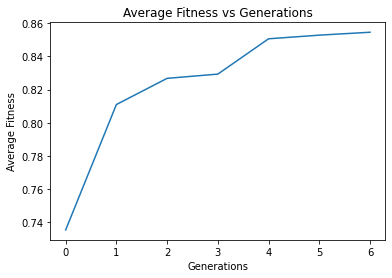

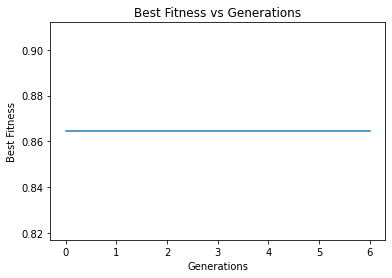

3:32:50.706283


[([77, 12, 0.4855711141605901], (0.8645,)),
 ([67, 12, 0.4855711141605901], (0.8636,)),
 ([77, 12, 0.4855711141605901], (0.8645,)),
 ([77, 12, 0.4855711141605901], (0.8645,)),
 ([77, 12, 0.4855711141605901], (0.8645,)),
 ([77, 12, 0.4855711141605901], (0.8645,)),
 ([77, 12, 0.4855711141605901], (0.8645,)),
 ([77, 12, 0.4855711141605901], (0.8645,)),
 ([77, 12, 0.4855711141605901], (0.8645,)),
 ([77, 12, 0.4855711141605901], (0.8645,)),
 ([77, 12, 0.4855711141605901], (0.8645,)),
 ([77, 12, 0.4855711141605901], (0.8645,)),
 ([77, 12, 0.4855711141605901], (0.8645,)),
 ([77, 12, 0.4855711141605901], (0.8645,)),
 ([77, 12, 0.4855711141605901], (0.8645,)),
 ([77, 12, 0.4855711141605901], (0.8645,)),
 ([77, 12, 0.4855711141605901], (0.8645,)),
 ([77, 12, 0.4855711141605901], (0.8645,)),
 ([77, 12, 0.4855711141605901], (0.8645,)),
 ([77, 12, 0.4855711141605901], (0.8645,)),
 ([77, 12, 0.4855711141605901], (0.8645,)),
 ([77, 12, 0.4855711141605901], (0.8645,)),
 ([77, 12, 0.4855711141605901], 

In [ ]:
import random as r 
!pip install deap
from deap import base, creator, tools
from time import sleep
import sys 

X_train, y_train, X_test, y_test = load()

creator.create("FitnessMax", base.Fitness, weights = (1.0,))
creator.create("Individual", list, fitness = creator.FitnessMax)
c_1, d_1, c_2, d_2 = int(input("Inserire il range neuroni nascosti e grandezza minibatch: c1 = ")), int(input("Inserire d1 ")), int(input("Inserire c2 ")), int(input("Inserire d2 "))
c_3, d_3 = float(input("Range per learning rate: ")), float(input("d3 "))

acc = {'acc': [], 'avg': []}

func_seq = [lambda:r.randint(c_1,d_1), lambda:r.randint(c_2,d_2), lambda: r.random()*(d_3-c_3)]

toolbox = base.Toolbox()
toolbox.register("individual", tools.initCycle, creator.Individual,
                 func_seq, n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual, 80)

def evaluate(Individual):
    net = MLP(Individual[0], Individual[2], Individual[1])
    return net.fit(X_train, y_train, X_test, y_test, 10),
    
def new_mut(Individual, indpb = 0.15):
    l1= [0,0,0]
    if (r.random() < indpb):
        l1[0] = (r.gauss(mu = Individual[0], sigma =1))
    if (r.random() < indpb):
        l1[1] = (r.gauss(mu = Individual[1], sigma =1))
    if (r.random() < indpb):
        l1[2] = (r.gauss(mu = Individual[2], sigma =0.1))
    return [abs(int(l1[0])), abs(int(l1[1])), abs(l1[2])]
    
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxUniform)
toolbox.register("mutate", new_mut)
toolbox.register("select", tools.selTournament, tournsize = 3, fit_attr='fitness')

def main():
    t1 = datetime.now()
    print(t1)
    pop = toolbox.population()
    CXPB, MUTPB, NGEN = 0.4, 0.2, 10
    
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
    
    for g in range(NGEN):
        offspring = toolbox.select(pop, len(pop))
        offspring = list(map(toolbox.clone,offspring))
        
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if(r.random() < CXPB):
                toolbox.mate(child1, child2, indpb = 0.2)
                del child1.fitness.values
                del child2.fitness.values
            
        for mutant in offspring:
            if(r.random() < MUTPB):
                toolbox.mutate(mutant)
                del mutant.fitness.values
        
        individui_da_valutare = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = list(map(toolbox.evaluate, individui_da_valutare))
        for ind, fit in zip(individui_da_valutare, fitnesses):
            ind.fitness.values = fit
        avg = 0.
        fits = []
        for ind in pop:
            avg+=ind.fitness.values[0]
            fits.append(ind.fitness.values[0])
        avg = avg/len(pop)
        acc['avg'].append(avg)
        
        index = np.argmax(fits)
        acc['acc'].append(fits[index])
           
        sys.stdout.write("[%-20s] %d%%" % ('='*int((g+1)*20/NGEN), (100/NGEN)*(g+1)))
        sys.stdout.flush()
        sleep(0.25)
        
        pop[:] = offspring
        
        pop_2 = [list(ind) for ind in pop]
        
        if len(np.unique(pop_2, axis = 0)) <=5:
            print('Last Gen ' +str(g+1))
            plt.plot(range(len(acc['avg'])), acc['avg'])
            plt.xlabel('Generations')
            plt.ylabel('Average Fitness')
            plt.show()
            plt.plot(range(len(acc['acc'])), acc['acc'])
            plt.xlabel('Generations')
            plt.ylabel('Best Fitness')
            plt.title('Best Fitness vs Generations')
            plt.show()
            print(pop)
            t2 = datetime.now()
            print(t2-t1)
            break
        t2 = datetime.now() 
        print(t2-t1)
        print("Generation #" + str(g))
      
    results = []
    for ind in pop:
        results.append((ind, ind.fitness.values))
    
    plt.plot(range(len(acc['avg'])), acc['avg'])
    plt.xlabel('Generations')
    plt.ylabel('Average Fitness')
    plt.title('Average Fitness vs Generations')
    plt.show()
    plt.plot(range(len(acc['acc'])), acc['acc'])
    plt.xlabel('Generations')
    plt.ylabel('Best Fitness')
    plt.title('Best Fitness vs Generations')
    plt.show()
    t2 = datetime.now()
    print(t2-t1)
    return results

#mini batch [10-150], eta [0.00001-1], nh [15-90]
main()